<a href="https://colab.research.google.com/github/MarciaC123/Trabajo-final/blob/main/Trabajo_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikeo rasterio dbfread

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import rasterio
import numpy as np
from scikeo.mla import MLA
from scikeo.plot import plotRGB
import matplotlib.pyplot as plt
from dbfread import DBF
import matplotlib as mpl
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path_raster = "/content/drive/MyDrive/2022-2/Análisis espacial/Trabajo final/Nuevo/V1.tif"
img = rasterio.open(path_raster)

path_endm = "/content/drive/MyDrive/2022-2/Análisis espacial/Trabajo final/Nuevo/Clasificacion_p5.dbf"
endm = DBF(path_endm)

In [ ]:
df = pd.DataFrame(iter(endm))
df.head()

,CLASSNAME,B1_V1,B2_V1,B3_V1,B4_V1,B5_V1,B6_V1,B7_V1,B8_V1
0,1,6776.0,6760.0,7060.0,6289.0,1325.0,1306.0,-0.057757,-0.672233
1,1,6156.0,6165.0,6376.0,5926.0,1220.0,1216.0,-0.036579,-0.669601
2,1,7113.0,7136.0,7366.0,6787.0,1312.0,1337.0,-0.040910,-0.689394
3,1,2837.0,2618.0,2584.0,2455.0,1596.0,1547.0,-0.025600,-0.242525
4,1,6075.0,5996.0,6217.0,5767.0,1292.0,1302.0,-0.037550,-0.645445


In [ ]:
inst = MLA(image=img, endmembers=endm)

In [ ]:
import warnings 
warnings.filterwarnings("ignore")

rf_class = inst.SVM(training_split = 0.71)

In [ ]:
rf_class.keys()

dict_keys(['Overall_Accuracy', 'Kappa_Index', 'Confusion_Matrix', 'Classification_Map', 'Image'])

In [ ]:
rf_class.get('Overall_Accuracy')

0.8222222222222222

In [ ]:
rf_class.get('Kappa_Index')

0.7892580125859798

In [ ]:
rf_class.get('Confusion_Matrix')

,0,1,2,3,4,5,6,7,Total,Users_Accuracy,Commission
0,13.0,0.0,0.000000,0.0,1.0,2.000000,0.0,2.0,18.0,72.222222,27.777778
1,0.0,6.0,2.000000,1.0,0.0,1.000000,0.0,1.0,11.0,54.545455,45.454545
2,0.0,2.0,13.000000,0.0,0.0,0.000000,0.0,0.0,15.0,86.666667,13.333333
3,0.0,0.0,0.000000,5.0,0.0,0.000000,0.0,0.0,5.0,100.000000,0.000000
4,0.0,0.0,0.000000,0.0,3.0,0.000000,0.0,0.0,3.0,100.000000,0.000000
5,0.0,0.0,0.000000,2.0,1.0,20.000000,0.0,0.0,23.0,86.956522,13.043478
6,0.0,0.0,0.000000,0.0,0.0,0.000000,7.0,0.0,7.0,100.000000,0.000000
7,0.0,0.0,0.000000,0.0,0.0,0.000000,1.0,7.0,8.0,87.500000,12.500000
Total,13.0,8.0,15.000000,8.0,5.0,23.000000,8.0,10.0,NaN,NaN,NaN
Producer_Accuracy,100.0,75.0,86.666667,62.5,60.0,86.956522,87.5,70.0,NaN,NaN,NaN


In [ ]:
# convert to array
arr_img = img.read()

# stacking the image
rgb = np.stack([arr_img[4,:,:], arr_img[3,:,:], arr_img[2,:,:]], axis = -1)

# Let's define the color palette
palette = mpl.colors.ListedColormap(["#2232F9","#F922AE","#229954","#7CED5E"])

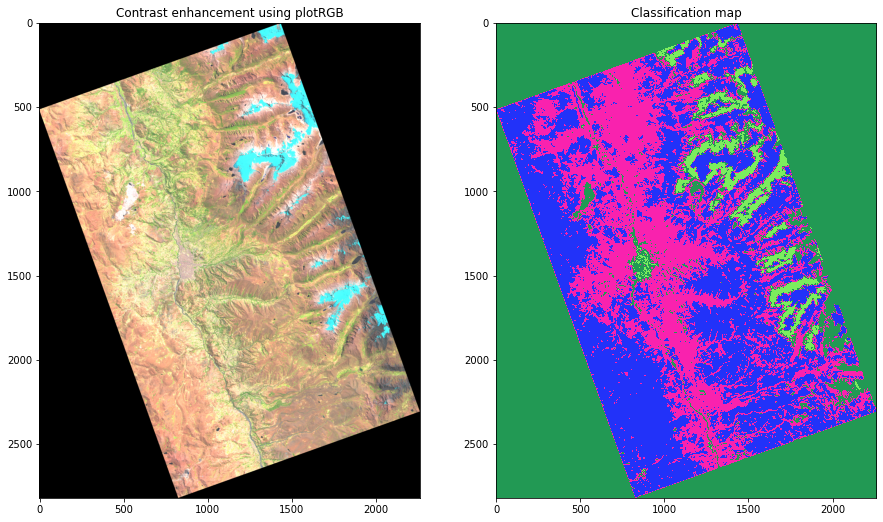

In [ ]:
# Let´s plot
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 9))

# satellite image
plotRGB(img, title = 'Contrast enhancement using plotRGB', ax = axes[0])

# class results
axes[1].imshow(rf_class.get('Classification_Map'), cmap = palette)
axes[1].set_title("Classification map")
axes[1].grid(False)

In [ ]:
pip install git+https://github.com/ytarazona/scikit-eo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ytarazona/scikit-eo to /tmp/pip-req-build-er8w0ne8
  Running command git clone -q https://github.com/ytarazona/scikit-eo /tmp/pip-req-build-er8w0ne8


In [ ]:
from scikeo.writeRaster import writeRaster

In [ ]:
writeRaster(arr = rf_class.get('Classification_Map'), 
   image = img, 
   filename = 'Trabajo_Final', 
   filepath = '/content/drive/MyDrive/2022-2/Análisis espacial/Trabajo final/Nuevo',
   n = 1)